In [1]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 2500)

In [2]:
data = pd.read_csv("Fahrplan", sep = "\t")

#Bei Ausfall wird Row gelöscht, bei Nan mit Mean der Column aufgefüllt
for column in list(data):
    if ("Delay" in column):
        data = data[data[column] != "fällt aus"]
        data = data[data[column] != "fÃ¤llt aus"]
        data[column] = pd.to_numeric(data[column])
        data[column].fillna(data[column].mean(), inplace = True)   

In [3]:
#Wochentage hinzufügen
weekdays = []
for date in data.Date.tolist():
    weekdays.append(datetime.datetime.strptime(date, "%d/%m/%y").weekday())
data["Weekdays"] = weekdays

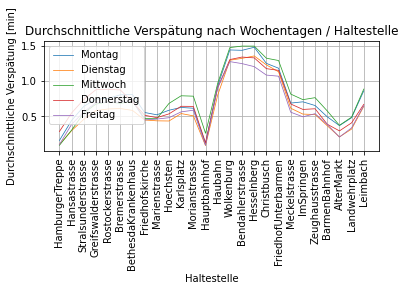

In [9]:
Wochentage = [0, 1, 2, 3, 4]
WochentagStr = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag"]
DelayMeans = []
for weekday in Wochentage:
    Haltestelle = []
    Delay = []
    selectedData = data[data["Weekdays"] == weekday]
    for column in list(selectedData):
        if ("Delay" in column):
            Haltestelle.append(column.replace("Delay", ""))
            Delay.append(selectedData[column].mean())
    plt.plot(Haltestelle, Delay, label = WochentagStr[weekday], linewidth = 0.75)
    plt.xticks(rotation = "vertical")
    plt.grid()
    plt.legend(loc = "upper left")
    plt.xlabel("Haltestelle")
    plt.ylabel("Durchschnittliche Verspätung [min]")
    plt.title("Durchschnittliche Verspätung nach Wochentagen / Haltestelle")
    DelayMeans.append(sum(Delay) / len(Delay))
plt.gcf().subplots_adjust(bottom= 0.5)

# plt.savefig("Durchschnittliche Verspätung nach Wochentagen und Haltestellen", dpi = 200)

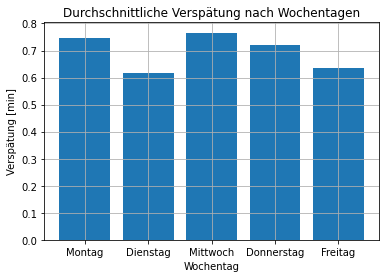

In [5]:
plt.bar(WochentagStr, DelayMeans, linewidth = 0.1)
plt.grid()
plt.xlabel("Wochentag")
plt.ylabel("Verspätung [min]")
plt.title("Durchschnittliche Verspätung nach Wochentagen")
# plt.savefig("Durchschnittliche Verspätung nach Wochentagen", dpi = 200)